## Instructions
Complete all **Exercises**, and submit answers to **Questions** on the Coursera 
platform.


## Getting Started

### Load packages

In this lab we will explore the data using the `dplyr` package and visualize it 
using the `ggplot2` package for data visualization. The data can be found in the
companion package for this course, `statsr`.

Let's load the packages.


In [1]:
library(statsr)
library(dplyr)
library(ggplot2)


Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### The data

In 2004, the state of North Carolina released a large data set containing 
information on births recorded in this state. This data set is useful to 
researchers studying the relation between habits and practices of expectant 
mothers and the birth of their children. We will work with a random sample of 
observations from this data set.

Load the `nc` data set into our workspace.


In [2]:
data(nc)

We have observations on 13 different variables, some categorical and some 
numerical. The meaning of each variable is as follows.

variable         | description
---------------- | ---------------------------------------------
`fage`           | father's age in years.
`mage`           | mother's age in years.
`mature`         | maturity status of mother.
`weeks`          | length of pregnancy in weeks.
`premie`         | whether the birth was classified as premature (premie) or full-term.
`visits`         | number of hospital visits during pregnancy.
`marital`        | whether mother is `married` or `not married` at birth.
`gained`         | weight gained by mother during pregnancy in pounds.
`weight`         | weight of the baby at birth in pounds.
`lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`).
`gender`         | gender of the baby, `female` or `male`.
`habit`          | status of the mother as a `nonsmoker` or a `smoker`.
`whitemom`       | whether mom is `white` or `not white`.

1. There are 1,000 cases in this data set, what do the cases represent? 
<ol>
<li> The hospitals where the births took place </li> 
<li> The fathers of the children </li> 
<li> The days of the births </li>
<li> The births </li>
</ol>

**Answer**: D. The births
* * *

As a first step in the analysis, we should take a look at the variables in the dataset. 
This can be done using the `str` command:


In [3]:
str(nc)

tibble [1,000 × 13] (S3: tbl_df/tbl/data.frame)
 $ fage          : int [1:1000] NA NA 19 21 NA NA 18 17 NA 20 ...
 $ mage          : int [1:1000] 13 14 15 15 15 15 15 15 16 16 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int [1:1000] 39 42 37 41 39 38 37 35 38 37 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 1 1 1 1 2 1 1 ...
 $ visits        : int [1:1000] 10 15 11 6 9 19 12 5 9 13 ...
 $ marital       : Factor w/ 2 levels "married","not married": 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int [1:1000] 38 20 38 34 27 22 76 15 NA 52 ...
 $ weight        : num [1:1000] 7.63 7.88 6.63 8 6.38 5.38 8.44 4.69 8.81 6.94 ...
 $ lowbirthweight: Factor w/ 2 levels "low","not low": 2 2 2 2 2 1 2 1 2 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ habit         : Factor w/ 2 levels "nonsmoker","smoker": 1 1 1 1 1 1 1 1 1 1 ...
 $ whitemom      : Factor w/ 2 levels "n

As you review the variable summaries, consider which variables are categorical and which 
are numerical. For numerical variables, are there outliers? If you aren't sure or want to 
take a closer look at the data, make a graph.

## Exploratory data analysis

We will first start with analyzing the weight gained by mothers throughout the 
pregnancy: `gained`.

Using visualization and summary statistics, describe the distribution of weight 
gained by mothers during pregnancy. The `summary` function can also be useful.


In [4]:
summary(nc$gained)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   20.00   30.00   30.33   38.00   85.00      27 

2. How many mothers are we missing weight gain data from?
<ol>
<li> 0 </li>
<li> 13 </li>
<li> 27 </li>
<li> 31 </li>
</ol>

**Answer**: C. 27. As reported by the summary statistics

Next, consider the possible relationship between a mother's smoking habit and the 
weight of her baby. Plotting the data is a useful first step because it helps 
us quickly visualize trends, identify strong associations, and develop research
questions.

3. Make side-by-side boxplots of `habit` and `weight`. Which of the following is 
**false** about the relationship between habit and weight?
<ol>
<li> Median birth weight of babies born to non-smoker mothers is slightly higher than that of babies born to smoker mothers. </li>
<li> Range of birth weights of babies born to non-smoker mothers is greater than that of babies born to smoker mothers. </li>
<li> Both distributions are extremely right skewed. </li>
<li> The IQRs of the distributions are roughly equal. </li>
</ol>


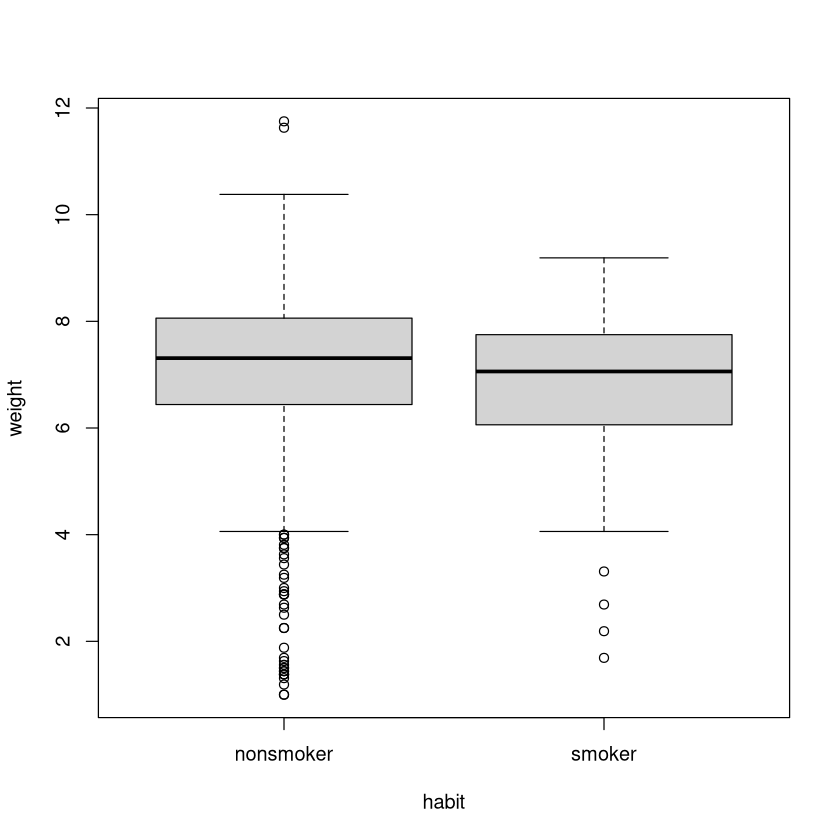

In [9]:
# type your code for the Question 3 here, and Knit
boxplot(
    weight~habit,
    data=nc
)

**Answer**: 3. Both distributions are extremely right skewed. In fact is the opposite, left skewed.

The box plots show how the medians of the two distributions compare, but we can
also compare the means of the distributions using the following to 
first group the data by the `habit` variable, and then calculate the mean
`weight` in these groups using the `mean` function.


In [11]:
nc %>%
  group_by(habit) %>%
  summarise(mean_weight = mean(weight))

habit,mean_weight
<fct>,<dbl>
nonsmoker,7.144273
smoker,6.828730
NA,3.630000


There is an observed difference, but is this difference statistically 
significant? In order to answer this question we will conduct a hypothesis 
test.

## Inference


### Exercise
**Exercise**: Are all conditions necessary for inference satisfied? Comment on each. You can compute the group sizes using the same `group_by` command above but replacing `mean(weight)` with `n()`.

In [12]:
nc %>%
  group_by(habit) %>%
  summarise(mean_weight = mean(weight), n=n())

habit,mean_weight,n
<fct>,<dbl>,<int>
nonsmoker,7.144273,873
smoker,6.828730,126
NA,3.630000,1


Conditions are met:
- Observations come from a random sample conducted by a reputed source.
- n > 30.
- Distribution functions are not extremely skewed.
- There is no interdependence between both groups.

4.  What are the hypotheses for testing if the average weights of babies born to 
smoking and non-smoking mothers are different?
<ol>
<li> $H_0: \mu_{smoking} = \mu_{non-smoking}$; $H_A: \mu_{smoking} > \mu_{non-smoking}$ </li>
<li> $H_0: \mu_{smoking} = \mu_{non-smoking}$; $H_A: \mu_{smoking} \ne \mu_{non-smoking}$ </li>
<li> $H_0: \bar{x}_{smoking} = \bar{x}_{non-smoking}$; $H_A: \bar{x}_{smoking} > \bar{x}_{non-smoking}$ </li>
<li> $H_0: \bar{x}_{smoking} = \bar{x}_{non-smoking}$; $H_A: \bar{x}_{smoking} > \bar{x}_{non-smoking}$ </li>
<li> $H_0: \mu_{smoking} \ne \mu_{non-smoking}$;  $H_A: \mu_{smoking} = \mu_{non-smoking}$ </li>
</ol>

**Answer**: The correct answer is B. $H_0: \mu_{smoking} = \mu_{non-smoking}$; $H_A: \mu_{smoking} \ne \mu_{non-smoking}$. We're interested in the both sides of the normal distribution.

Next, we introduce a new function, `inference`, that we will use for conducting
hypothesis tests and constructing confidence intervals. 

Then, run the following:

Response variable: numerical
Explanatory variable: categorical (2 levels) 
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
H0: mu_nonsmoker =  mu_smoker
HA: mu_nonsmoker != mu_smoker
t = 2.359, df = 125
p_value = 0.0199

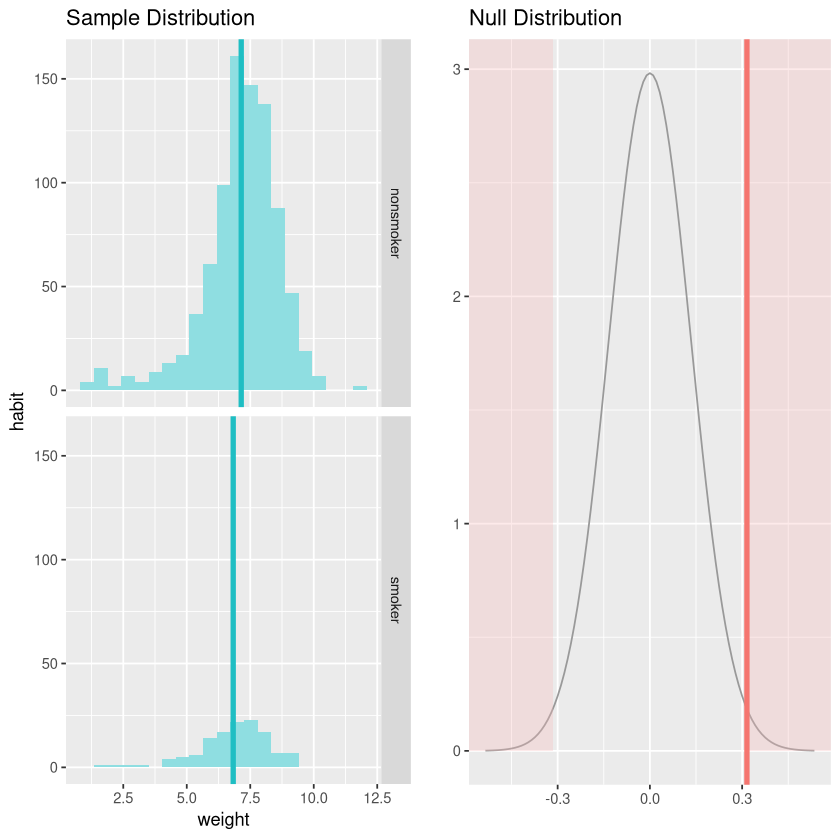

In [14]:
inference(y = weight, x = habit, data = nc, statistic = "mean", type = "ht", null = 0, 
          alternative = "twosided", method = "theoretical")

Let's pause for a moment to go through the arguments of this custom function. 
The first argument is `y`, which is the response variable that we are 
interested in: `weight`. The second argument is the explanatory variable, 
`x`, which is the variable that splits the data into two groups, smokers and 
non-smokers: `habit`. The third argument, `data`, is the data frame these
variables are stored in. Next is `statistic`, which is the sample statistic
we're using, or similarly, the population parameter we're estimating. In future labs
we can also work with "median" and "proportion". Next we decide on the `type` of inference 
we want: a hypothesis test (`"ht"`) or a confidence interval (`"ci"`). When performing a 
hypothesis test, we also need to supply the `null` value, which in this case is `0`, 
since the null hypothesis sets the two population means equal to each other. 
The `alternative` hypothesis can be `"less"`, `"greater"`, or `"twosided"`. 
Lastly, the `method` of inference can be `"theoretical"` or `"simulation"` based.

For more information on the inference function see the help file with `?inference`.

### Exercise
**Exercise**: What is the conclusion of the hypothesis test?

**Answer**: Based on the p-value, which is < 0.05, the data provided supports the rejection of the $H_0$ in favor of the alternative hypothesis $H_A$. In this context $H_A$ consists in that babies weights between smokers and non-smokers mothers are significantly different.

5.  Change the `type` argument to `"ci"` to construct and record a confidence 
interval for the difference between the weights of babies born to nonsmoking and 
smoking mothers, and interpret this interval in context of the data. Note that by 
default you'll get a 95% confidence interval. If you want to change the
confidence level, add a new argument (`conf_level`) which takes on a value
between 0 and 1. Also note that when doing a confidence interval arguments like
`null` and `alternative` are not useful, so make sure to remove them.
<ol>
<li> We are 95% confident that babies born to nonsmoker mothers are on average 0.05 to 0.58 pounds lighter at birth than babies born to smoker mothers. </li>
<li> We are 95% confident that the difference in average weights of babies whose moms are smokers and nonsmokers is between 0.05 to 0.58 pounds. </li>
<li> We are 95% confident that the difference in average weights of babies in this sample whose moms are smokers and nonsmokers is between 0.05 to 0.58 pounds. </li>
<li> We are 95% confident that babies born to nonsmoker mothers are on average 0.05 to 0.58 pounds heavier at birth than babies born to smoker mothers. </li>
</ol>

**Answer**: D. We are 95% confident that babies born to nonsmoker mothers are on average 0.05 to 0.58 pounds heavier at birth than babies born to smoker mothers.

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
95% CI (nonsmoker - smoker): (0.0508 , 0.5803)


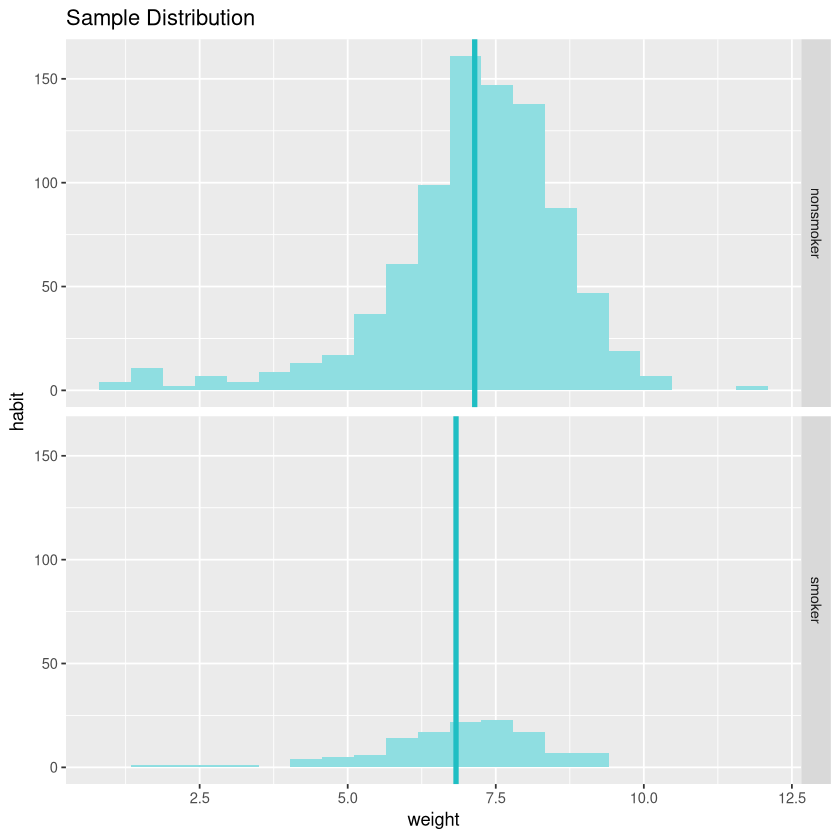

In [16]:
#type your code for the Question 5 here, and Knit
inference(y = weight, x = habit, data = nc, statistic = "mean", 
          type = "ci", method = "theoretical")

By default the function reports an interval for ($\mu_{nonsmoker} - \mu_{smoker}$)
. We can easily change this order by using the `order` argument:


Response variable: numerical, Explanatory variable: categorical (2 levels)
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
95% CI (smoker - nonsmoker): (-0.5803 , -0.0508)


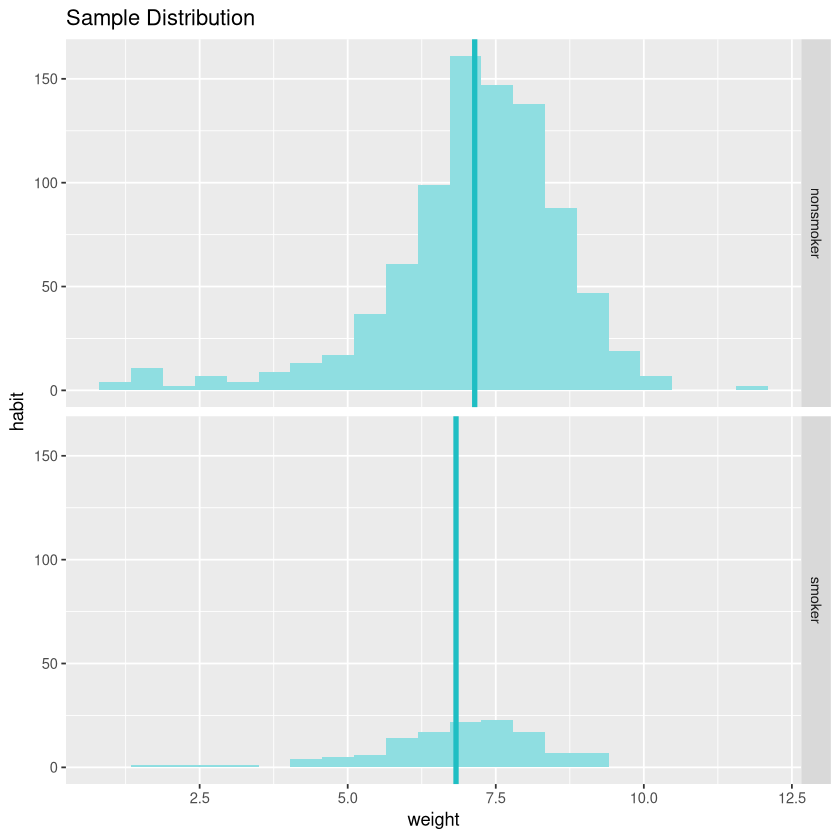

In [17]:
inference(y = weight, x = habit, data = nc, statistic = "mean", type = "ci", 
          method = "theoretical", order = c("smoker","nonsmoker"))


6. Calculate a 99% confidence interval for the average length of pregnancies 
(`weeks`). Note that since you're doing inference on a single population 
parameter, there is no explanatory variable, so you can omit the `x` variable 
from the function. Which of the following is the correct interpretation of this 
interval?
<ol>
<li>(38.1526 , 38.5168)</li>
<li>(38.0892 , 38.5661)</li>
<li>(6.9779 , 7.2241)</li>
<li>(38.0952 , 38.5742)</li>
</ol>

**Answer**: D. (38.0952 , 38.5742)

Single numerical variable
n = 998, y-bar = 38.3347, s = 2.9316
99% CI: (38.0952 , 38.5742)


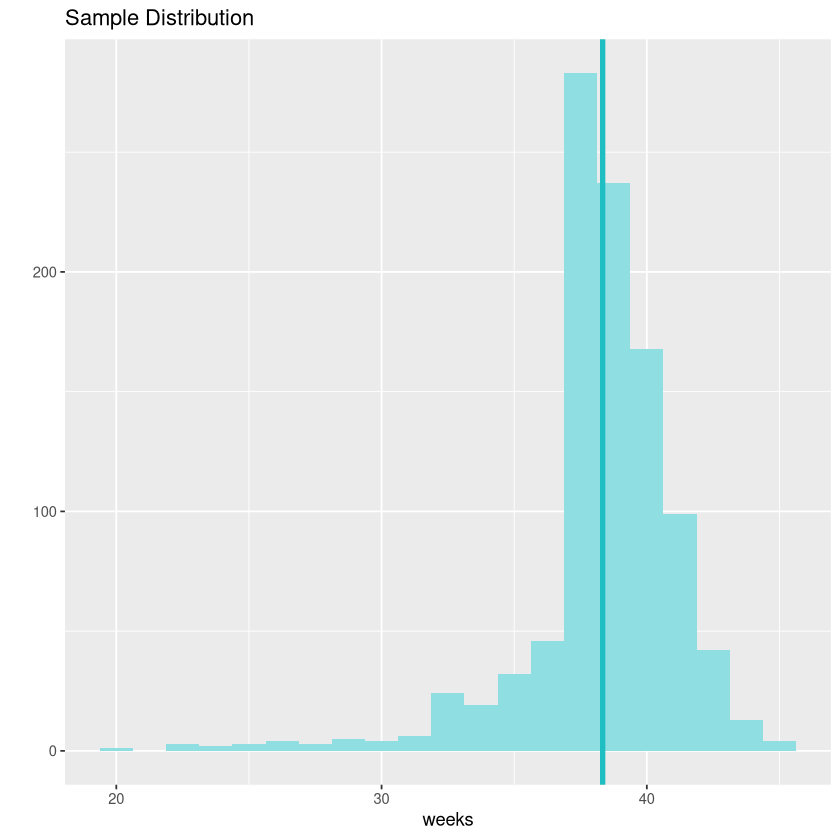

In [19]:
# type your code for Question 6 here, and Knit
inference(y = weeks, data = nc, statistic = "mean", type = "ci", 
          method = "theoretical", conf_level=.99)


## Exercise
**Exercise**: Calculate a new confidence interval for the same parameter at the 90% confidence level. Comment on the width of this interval versus the one obtained in the the previous exercise.

As expected, the CI for a 90% CL, is shorter.

Single numerical variable
n = 998, y-bar = 38.3347, s = 2.9316
90% CI: (38.1819 , 38.4874)


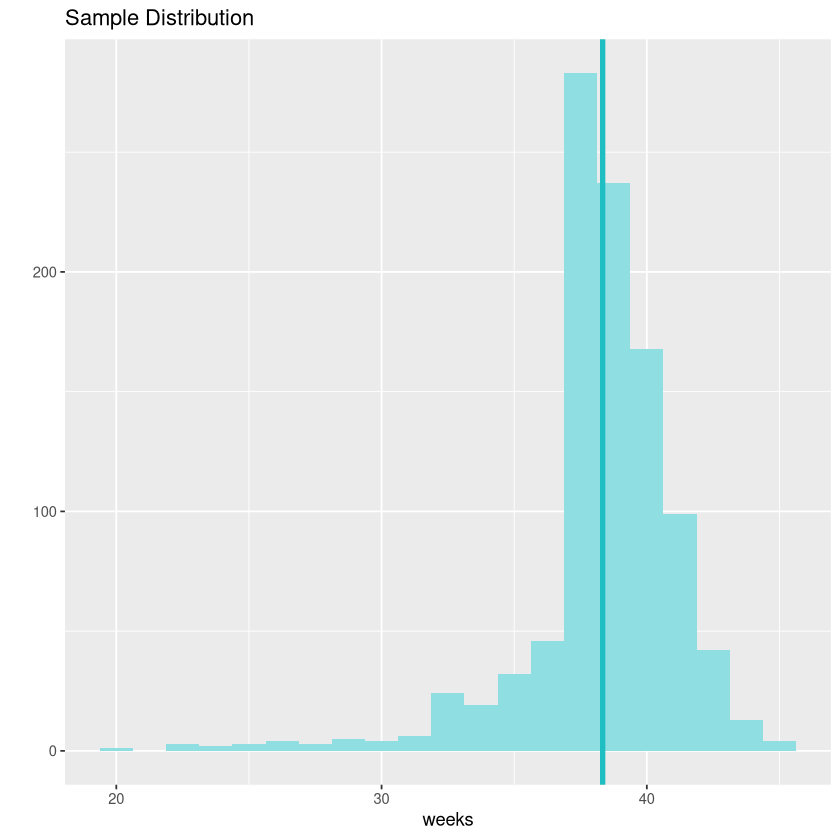

In [20]:
# type your code for the Exercise here, and Knit
inference(y = weeks, data = nc, statistic = "mean", type = "ci", 
          method = "theoretical", conf_level=.90)


### Exercise
**Exercise**: Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.


Response variable: numerical
Explanatory variable: categorical (2 levels) 
n_mature mom = 129, y_bar_mature mom = 28.7907, s_mature mom = 13.4824
n_younger mom = 844, y_bar_younger mom = 30.5604, s_younger mom = 14.3469
H0: mu_mature mom =  mu_younger mom
HA: mu_mature mom != mu_younger mom
t = -1.3765, df = 128
p_value = 0.1711

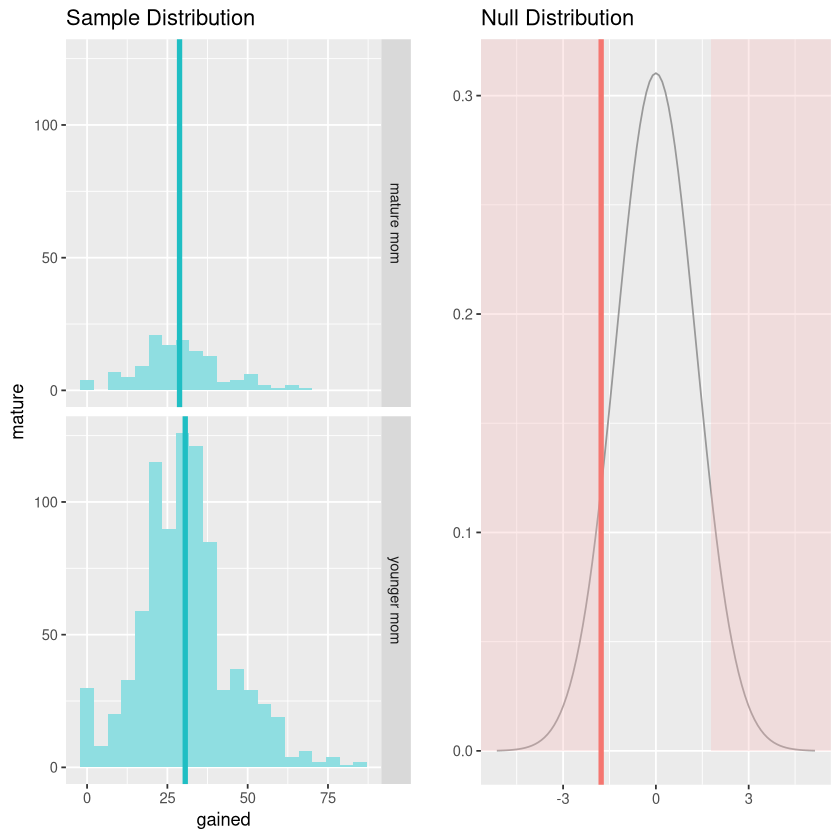

In [21]:
# type your code for the Exercise here, and Knit
inference(y = gained, x = mature, data = nc, statistic = "mean", type = "ht", null = 0, 
          alternative = "twosided", method = "theoretical")


7. Now, a non-inference task: Determine the age cutoff for younger and mature 
mothers. Use a method of your choice, and explain how your method works.


In [27]:
# type your code for Question 7 here, and Knit
nc %>%
  group_by(mature) %>%
  summarise(min=min(mage), max=max(mage))


mature,min,max
<fct>,<int>,<int>
mature mom,35,50
younger mom,13,34


### Exercise
**Exercise**: Pick a pair of variables: one numerical (response) and one categorical 
(explanatory). Come up with a research question evaluating the relationship between 
these variables. Formulate the question in a way that it can be answered using a 
hypothesis test and/or a confidence interval. Answer your question using the `inference` 
function, report the statistical results, and also provide an explanation in 
plain language. Be sure to check all assumptions,state your $\alpha$ level, and conclude 
in context. (Note: Picking your own variables, coming up with a research question,
and analyzing the data to answer this question is basically what you'll need to do for
your project as well.)
</div>


In [28]:
# type your code for the Exercise here, and Knit


This is a product of OpenIntro that is released under a [Creative Commons 
Attribution-ShareAlike 3.0 Unported](http://creativecommons.org/licenses/by-sa/3.0).
This lab was written for OpenIntro by Andrew Bray and Mine &Ccedil;etinkaya-Rundel.
